In [1]:
import os
os.environ['R_HOME'] = '/data1/lesliec/sneha/anaconda/envs/crc-env/lib/R'
from rpy2.rinterface_lib import openrlib
openrlib.R_HOME = '/data1/lesliec/sneha/anaconda/envs/crc-env/lib/R'
import scanpy as sc
import pandas
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython

In [4]:
%%R
library(EnhancedVolcano)

In [5]:
adata = sc.read_h5ad('./data/scrna_il10_dep_tumor_T.h5ad')

In [32]:
adat_dge = adata.raw.to_adata()
adat_dge.obs['sample_celltype'] = [r['sample'] + '_' + r['celltype'] for i,r in adat_dge.obs.iterrows()]
adat_dge = adat_dge[adat_dge.obs['celltype'].isin(['PD1+ Th1', 'IL10- Treg', 'Th1',
                                                                            'Th17', 'IL10+ Treg', 'Tfh'])].copy()
sc.pp.normalize_total(adat_dge, target_sum=1e4)
sc.pp.log1p(adat_dge)
sc.pp.filter_genes(adat_dge, min_cells=50) 
sc.tl.rank_genes_groups(adat_dge, 'sample', groups=['DT'], 
                        method='t-test') 
diff_genes_tumor_t = sc.get.rank_genes_groups_df(adat_dge, group='DT').copy()

In [33]:
diff_genes_tumor_t = diff_genes_tumor_t[~diff_genes_tumor_t.names.str.startswith("Rps")]
diff_genes_tumor_t = diff_genes_tumor_t[~diff_genes_tumor_t.names.str.startswith("Rpl")]
diff_genes_tumor_t = diff_genes_tumor_t[~diff_genes_tumor_t.names.str.startswith("Gm")]
diff_genes_tumor_t = diff_genes_tumor_t[~diff_genes_tumor_t.names.str.startswith("Mt")]
diff_genes_tumor_t = diff_genes_tumor_t[~diff_genes_tumor_t.names.str.startswith("AA")]
diff_genes_tumor_t = diff_genes_tumor_t[~diff_genes_tumor_t.names.str.startswith("Rbm3")]

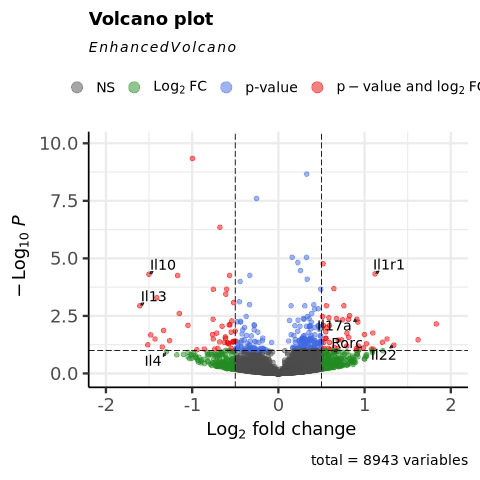

In [34]:
%%R -i diff_genes_tumor_t

p1 <- EnhancedVolcano(diff_genes_tumor_t,
    lab = diff_genes_tumor_t$names,
    x = 'logfoldchanges',
    y = 'pvals_adj',
    pCutoff = 0.1,
    FCcutoff = 0.5, xlim=c(-2, 2), ylim=c(-0.1, 10), selectLab=c('Il17a', 'Il22', 'Il10', 'Rorc',
                                                                'Il13', 'Il4', 'Il1r1'),
    drawConnectors=TRUE) #+ coord_flip()

print(p1)